# Importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Loading dataset

In [16]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [17]:
X_train, y_train =  train.drop(["Depression"], axis=1), train["Depression"]
X_test, y_test =  test.drop(["Depression"], axis=1), test["Depression"]

# Model training

In [18]:
rf = RandomForestClassifier()

In [19]:
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 50, 80, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [20]:
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,  scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [21]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 50, 80, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring='accuracy', verbose=2)

# Model Evaluation

In [22]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}
Best Cross-Validated Accuracy: 0.8433034807187901


In [23]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2320
           1       0.84      0.89      0.87      3247

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.83      5567
weighted avg       0.84      0.84      0.84      5567



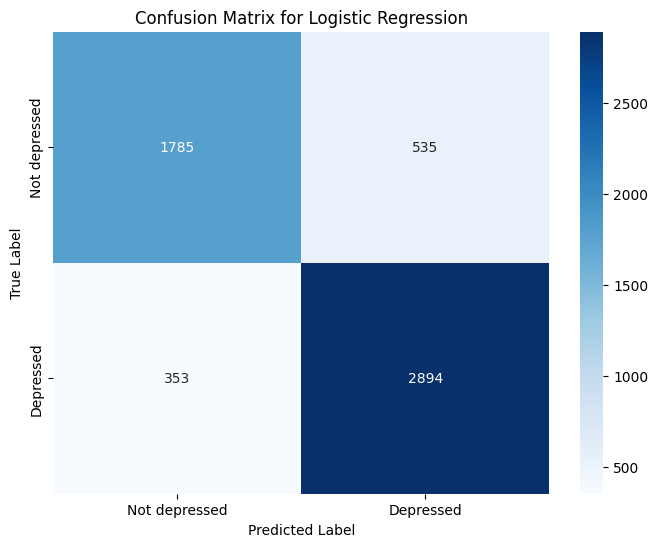

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance

In [26]:
# Get feature importances
importances = best_model.feature_importances_

# Print feature importances
for feature, importance in sorted(zip(train.columns, importances), key=lambda x: x[0], reverse=True):
    print(f"{feature}: {importance:.4f}")

Work/Study Hours: 0.0590
Study Satisfaction: 0.0342
Sleep Duration: 0.0210
Have you ever had suicidal thoughts ?: 0.3022
Gender: 0.0091
Financial Stress: 0.1158
Family History of Mental Illness: 0.0102
Dietary Habits: 0.0379
Degree: 0.0380
City: 0.0427
CGPA: 0.0532
Age: 0.0726
Academic Pressure: 0.2040
